In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Supressing a warning about deprecated sns.distplot further down

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.head()



,purch_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,1340,5650,221900
1,12,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,2720,8062,180000
3,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,1360,5000,604000
4,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,1800,7503,510000


In [3]:
data.shape

(21597, 18)

In [4]:
baseline_data = data
baseline_data.head()

#Backing up the original data for later use prior to transformations

,purch_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,1340,5650,221900
1,12,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,2720,8062,180000
3,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,1360,5000,604000
4,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,1800,7503,510000


In [5]:
data.describe()

,purch_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,6.573969,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,1973.382322,98077.951845,1986.620318,12758.283512,5.402966e+05
std,3.115061,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,28.808668,53.513072,685.230472,27274.441950,3.673681e+05
min,1.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,399.000000,651.000000,7.800000e+04
25%,4.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,1490.000000,5100.000000,3.220000e+05
50%,6.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,1840.000000,7620.000000,4.500000e+05
75%,9.000000,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,2360.000000,10083.000000,6.450000e+05
max,12.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,7.700000e+06


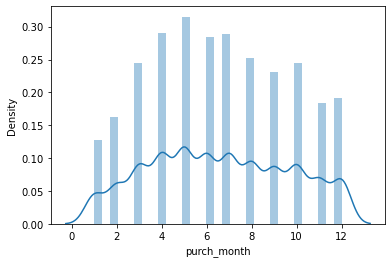

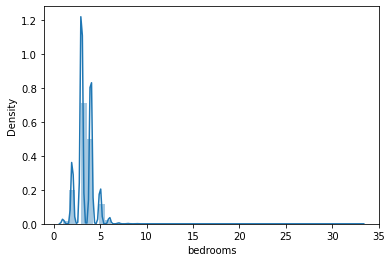

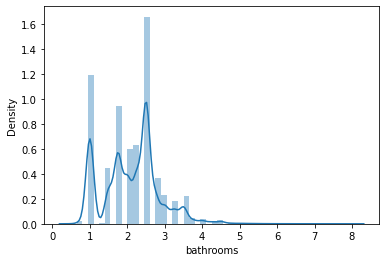

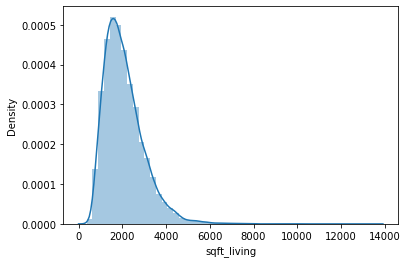

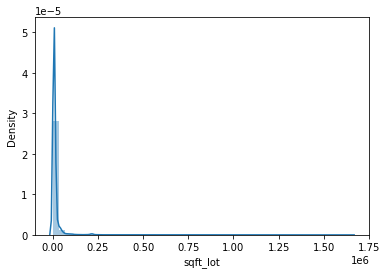

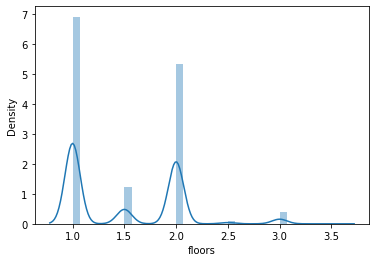

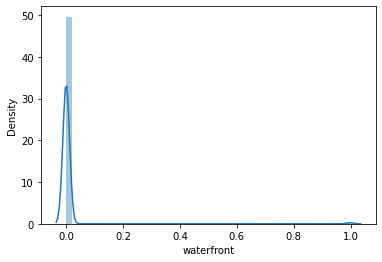

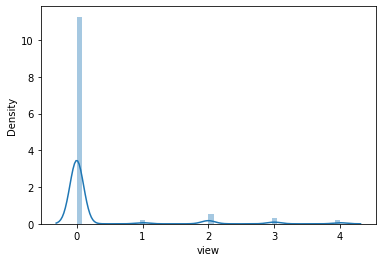

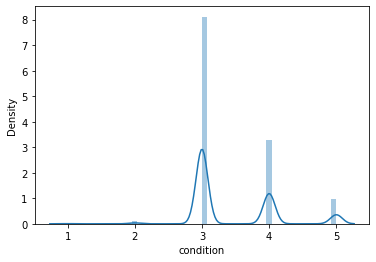

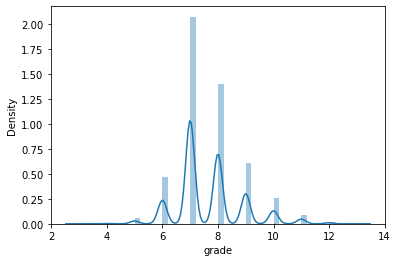

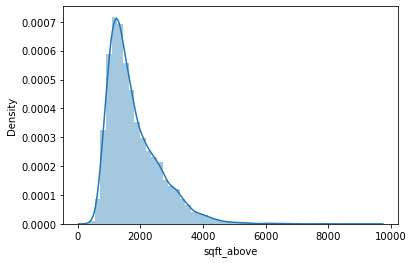

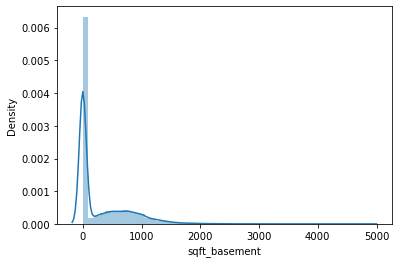

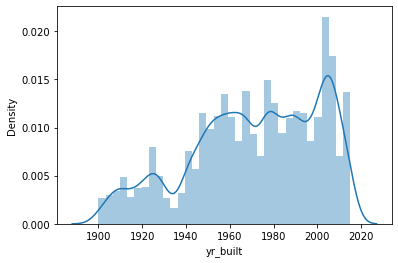

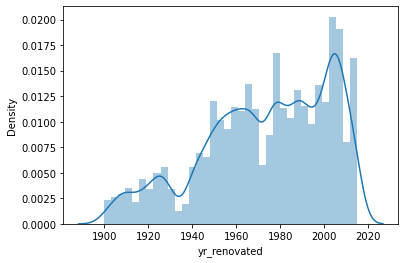

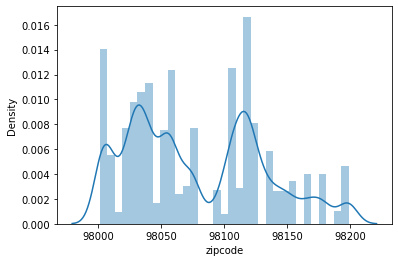

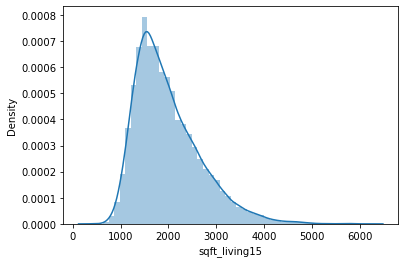

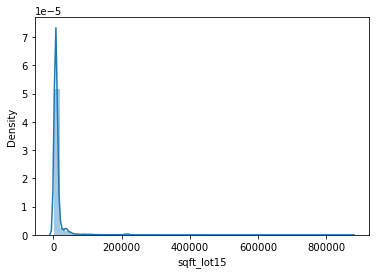

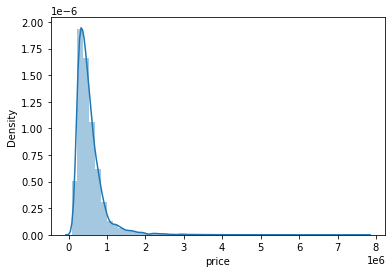

In [6]:
# Printing a dist plot for each of the numerical features to visually check for distributions and outliers
for col in data:
    sns.distplot(data[col])
    plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

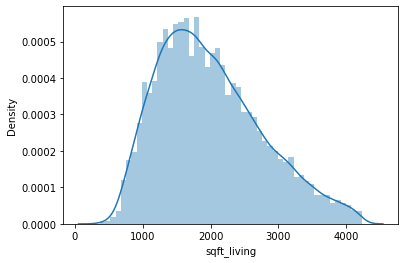

In [7]:
IQR = np.percentile(data['sqft_living'], 75) - np.percentile(data['sqft_living'], 25)
u_limit = np.percentile(data['sqft_living'], 75) + 1.5*IQR
l_limit = np.percentile(data['sqft_living'], 25) - 1.5*IQR
data = data[(data['sqft_living'] < u_limit) & (data['sqft_living'] > l_limit)]
data = data.reset_index(drop=True)
sns.distplot(data['sqft_living'])

# Correcting the skew of the data by triming outliers

In [8]:
data.shape

(21015, 18)

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

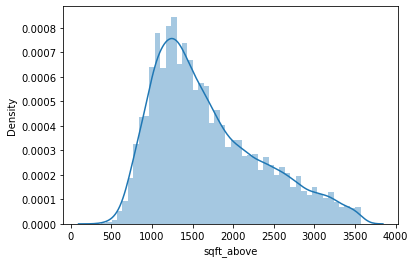

In [9]:
IQR = np.percentile(data['sqft_above'], 75) - np.percentile(data['sqft_above'], 25)
u_limit = np.percentile(data['sqft_above'], 75) + 1.5*IQR
l_limit = np.percentile(data['sqft_above'], 25) - 1.5*IQR
data = data[(data['sqft_above'] < u_limit) & (data['sqft_above'] > l_limit)]
data = data.reset_index(drop=True)
sns.distplot(data['sqft_above'])

In [10]:
data.shape

(20612, 18)

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

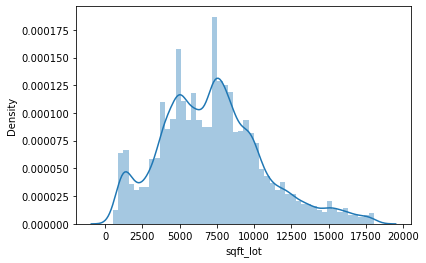

In [11]:
IQR = np.percentile(data['sqft_lot'], 75) - np.percentile(data['sqft_lot'], 25)
u_limit = np.percentile(data['sqft_lot'], 75) + 1.5*IQR
l_limit = np.percentile(data['sqft_lot'], 25) - 1.5*IQR
data = data[(data['sqft_lot'] < u_limit) & (data['sqft_lot'] > l_limit)]
data = data.reset_index(drop=True)
sns.distplot(data['sqft_lot'])

In [12]:
data.shape

(18463, 18)

In [13]:
# I dont feel that any further transformations are necessary given the data we have. 
#Normally I would expect to use log or power transformations to adjust the distribution of continuous variables

In [14]:
data.head()

,purch_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,1340,5650,221900
1,12,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,2720,8062,180000
3,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,1360,5000,604000
4,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,1800,7503,510000


In [15]:
trans_data = data.drop(['purch_month', 'zipcode'], axis=1)
trans_data.head()

baseline_feats = baseline_data.drop(['purch_month', 'zipcode'], axis=1)

# Dropping the unencoded categoricals from our working data and our baseline set

In [16]:
trans_data.shape

(18463, 16)

In [17]:
baseline_data.shape

(21597, 18)

In [18]:
# Encoding purch_month and zipcode with OHE
OHE = OneHotEncoder(drop='first')

In [19]:

month_ohe = OHE.fit_transform(data['purch_month'].values.reshape(-1, 1))
month_ohe = pd.DataFrame(month_ohe.toarray())

month_ohe.columns = month_ohe.columns.astype(str)
# The x/y split below was throwing an error about a mixture of str and int header types 
# so weve changed the ohe output headers to str type

month_ohe.head()




,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

baseline_month_ohe = OHE.fit_transform(baseline_data['purch_month'].values.reshape(-1, 1))
baseline_month_ohe = pd.DataFrame(baseline_month_ohe.toarray())

baseline_month_ohe.columns = baseline_month_ohe.columns.astype(str)

In [21]:
zip_ohe = OHE.fit_transform(data['zipcode'].values.reshape(-1, 1))
zip_ohe = pd.DataFrame(zip_ohe.toarray())

zip_ohe.columns = zip_ohe.columns.astype(str)

zip_ohe.head()



#  I wanted to find a better way to encode/make use of this column.
# Obviously onehot makes for lots of extra columns for each unique zip
# Zipcodes need to be treated as categorical because otherwise the model would treat one zip with a higher number as 'better'
# Label or Ordianl encoding would cause us the same problem. 

#  I read about Target Encoding which would replace zips with the mean of sale price (our target column) for each unique zip 
# allowing us to preserve the zips relation to the tartget. 
# Time allowing I will come back and try this but for now I will just use onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
baseline_zip_ohe = OHE.fit_transform(baseline_data['zipcode'].values.reshape(-1, 1))
baseline_zip_ohe = pd.DataFrame(baseline_zip_ohe.toarray())

baseline_zip_ohe.columns = zip_ohe.columns.astype(str)



In [23]:
final_data = pd.concat([trans_data, month_ohe, zip_ohe ], axis=1)
final_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,1340,5650,221900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,2720,8062,180000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,1360,5000,604000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,1800,7503,510000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
final_data.shape

(18463, 96)

In [25]:
final_data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
price            0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23               0
24               0
25          

In [26]:
baseline_final_data = pd.concat([baseline_feats, baseline_month_ohe, baseline_zip_ohe ], axis=1)
baseline_final_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,1340,5650,221900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,2720,8062,180000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,1360,5000,604000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,1800,7503,510000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
baseline_final_data.shape

(21597, 96)

In [28]:
baseline_final_data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
price            0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23               0
24               0
25          

In [29]:
final_data.to_csv('final_model_data.csv', index=False)

baseline_final_data.to_csv('baseline_model_data.csv', index=False)

#Exporting our finished datasets to be modeled in the next sheet